In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from snownlp import SnowNLP
import jiagu
import matplotlib.pyplot as plt
import jieba

import jieba.analyse
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import jieba.posseg as pseg
from tqdm import tqdm
import collections
import seaborn as sns

In [3]:
dfc = pd.read_csv('..\data\data_C.csv',index_col = 0,dtype = {'simple review':str,'review':str,})
dfe = pd.read_csv('..\data\data_E.csv',index_col = 0,dtype = {'simple review':str,'review':str,})

In [4]:
sum(pd.notnull(dfc['review'])) # 3062 lines with review
dfc_review = dfc[pd.notnull(dfc['review'])] 
dfc_review = dfc_review.reset_index(drop = True)
dfc_review

3062

,car type,purch time,purch place,purch price,avg rate,publish time,score,purch purp,simple review,review,cum mileage
0,2019款奔驰C级C 300 L 运动版,2019-01-01,上海星瀚汽车维修服务有限公司（奔驰） [上海市],35万 (厂商指导价 47.48万),15L/100km,2019-03-07,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],外观惊艳，内饰完美，30万级别绝对无敌手，音响比较hao啊，后备箱有点小了，我自己的话是够用...,[最满意]\n绚丽的立标外观，迷离的多条式轮圈，车身流畅的线条，光看前脸，回头率比较高，从侧...,NaN
1,2019款奔驰C级C 300 L 运动版,2019-01-01,烟台之星汽车服务有限公司 [山东省],49万 (厂商指导价 47.48万),9L/100km,2019-03-07,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],绚丽的立标外观，迷离的多条式轮圈，车身流畅的线条，光看前脸，回头率比较高，从侧面看就有种蓄势...,[最满意]\n外观惊艳，内饰完美，超乎我的预期\n[不满意]\n后备箱有点小了，我自己的话是...,NaN
2,2018款奔驰C级C 200 L,2018-11-01,北京之星汽车服务有限公司 [北京市],30万 (厂商指导价 35.08万),9L/100km,2019-02-14,"{'外观': '5', '内饰': '4', '空间': '5', '舒适': '5', '...",['购物'],不管时外型还是配置和是操纵感，都比较满足我的要求，我想要的它都给了我，所以我选择,[最满意]\n最喜欢的还是奔驰的大标，就是那么的大气，透着一股高端范。说白了就是儿时梦想。车...,NaN
3,2018款奔驰C级C 200 L 运动型 成就特别版,2018-07-01,南京江北之星汽车服务有限公司 [江苏省],32.38万 (厂商指导价 35.38万),10L/100km,2018-12-10,"{'外观': '5', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物']",这车可没有性价比，比起宝马奥迪真心贵，没什么优惠，奔驰卖的还硬，但是保值呀,[最满意]\n最满意的是外观内饰，再一个就是最新的9速自动变速箱，很聪明，唯一有一个理由就是...,NaN
4,2018款奔驰C级C 200 L 运动版,2018-01-01,利星行(北京)汽车有限公司 [北京市],35.8万 (厂商指导价 35.08万),10.6L/100km,2018-11-25,"{'外观': '5', '内饰': '4', '空间': '4', '舒适': '5', '...","['上班', '购物', '自驾游']",外观简单大气，自我感觉内饰好看有设计感，加长版后排空间大，后备箱空间也比较满意，平均油耗比较...,[最满意]\n用车时间小一年，这款车型很多人都有所了解，现在发一下用车以来的自我感觉以及评价...,NaN
5,2008款奔驰C级C 200K 时尚型,2008-05-01,[河北省],41.98万 (厂商指导价 万),8.8L/100km,2018-11-21,"{'外观': '5', '内饰': '4', '空间': '3', '舒适': '4', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",很喜欢这个品牌，一生值得拥有。作为一个男人，我感觉在条件许可的情况下必须拥有。首先是品牌实力...,[最满意]\n外形。射手座男，本身就喜欢浪漫不羁，自由奔放，热爱生活。崇尚美追求美。遗传基因...,NaN
6,2019款奔驰C级C 180 L 时尚型运动版,2018-10-01,[北京市],26万 (厂商指导价 31.58万),10L/100km,2018-11-20,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",最满意的就是外观和内饰了，在bba里真的就算很漂亮的了。Mercedesme非常不错，可以远...,[最满意]\n最满意的就是外观和内饰了，在bba里真的就算很漂亮的了。Mercedesme非...,NaN
7,2017款奔驰C级C 200 运动版,2017-11-19,重庆市合翘汽车销售服务有限公司 [重庆市],38.38万 (厂商指导价 31.48万),8.7L/100km,2017-11-29,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],"不错,美中不足要加价,选配较难.具体我写了一篇作业.http://www.xcar.com....",[最满意]\n外观.奔驰的内饰一直口碑不错，柏林之声和真皮内饰更是锦上添花。柏林之声的高低音...,NaN
8,2015款奔驰C级C 300 L,2016-05-25,x上海闵星汽车服务有限公司金桥分公司 [上海市],38.5万 (厂商指导价 48.90万),8.3L/100km,2016-09-06,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '购物', '接送小孩', '自驾游', '跑长途']",NaN,[最满意]\n外观漂亮，时尚，内饰科技感强，比较豪华，动力比较足，操控精准。奔驰的整体质量比...,NaN
9,2010款奔驰C级C 180K 经典版,2011-12-06,苏州利星汽车服务有限公司 [江苏省],30万 (厂商指导价 30.80万),11L/100km,2016-08-03,"{'外观': '5', '内饰': '5', '空间': '1', '舒适': '3', '...",['上班'],NaN,[最满意]\n品牌，没什么可说的，就是冲着这品牌去的啦。其次是底盘，过完什么的信心十足。\n...,NaN


In [4]:
sum(pd.notnull(dfe['review'])) # 3062 lines with review
dfe_review = dfe[pd.notnull(dfe['review'])] 
dfe_review = dfe_review.reset_index(drop = True)
dfe_review

1708

,car type,purch time,purch place,purch price,avg rate,publish time,score,purch purp,simple review,review,cum mileage
0,2015款奔驰E级改款 E 260L 运动型,2015-07-01,[河南省],42万 (厂商指导价 46.80万),9.9L/100km,2019-04-09,"{'外观': '4', '内饰': '3', '空间': '4', '舒适': '4', '...","['上班', '接送小孩', '跑长途', '商务接送']",4年的老车了，就拿最新款的比吧，外观我反而喜欢我的老款，新款的尾灯胎小气了。总体还是可以的，...,[最满意]\n放到现在依然不错甚至自认为超过现款的外观！奔驰总是这样，大改款小改款总是改的让...,NaN
1,2017款奔驰E级E 200 运动版,2017-10-26,重庆商社麒兴汽车销售服务有限公司 [重庆市],40万 (厂商指导价 42.28万),9.2L/100km,2018-11-20,"{'外观': '5', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物', '接送小孩', '自驾游', '商务接送']",标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感。内饰氛围的豪华感十足，中控的大屏很震...,[最满意]\n1、标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感，引擎盖两条肌肉棱线...,NaN
2,2014款奔驰E级改款 E 260L 运动版,2014-01-01,北京之星汽车服务有限公司 [北京市],36.5万 (厂商指导价 44.50万),9.5L/100km,2018-08-28,"{'外观': '3', '内饰': '5', '空间': '4', '舒适': '4', '...","['上班', '购物', '接送小孩', '商务接送']",奔驰的质感在同年份的车里数一数二，尤其内饰的奢华感，基本可以让你分分钟签单买车。行驶质感，隔...,[最满意]\n内饰质感好，当初买车的时候，主要在XTS，5系和E级之间犹豫。5系内饰实在接受...,NaN
3,2018款奔驰E级改款 E 300 L 运动豪华型,2018-07-10,[北京市],45.3万 (厂商指导价 50.28万),11L/100km,2018-08-01,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩', '拉货']",整体都还可以，就是轮毂太丑了，减配COMMAND系统不能接受。据说轮胎容易坏，目前正在测试中...,[最满意]\n内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标...,NaN
4,2017款奔驰E级E 200L 4MATIC 运动型,2017-02-05,x上海东华之星汽车维修服务有限公司宝山分公司 [上海市],56万 (厂商指导价 45.98万),9.6L/100km,2017-02-09,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '商务接送']",总之买了不后悔，很不错，新E的产生真的是完全碾压了其他竞争对手,[最满意]\n外观霸气非常，不认识的人都以为是迈巴赫，不用说，面子感十足 内饰也是用了S级的...,NaN
5,2016款奔驰E级E 320L 4MATIC,2016-01-06,宿迁文峰伟恒汽车销售服务有限公司 [江苏省],49万 (厂商指导价 万),12L/100km,2016-09-02,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['上班'],NaN,[最满意]\n动力，3.0v6双涡轮的发动机 ，价格也算不错。\n[不满意]\n小毛病多 刚...,NaN
6,2015款奔驰E级E 260L 运动型,2016-04-08,[山东省],41万 (厂商指导价 46.80万),10.3L/100km,2016-08-03,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...",['商务接送'],NaN,[最满意]\n商务接送有面子，空间大，真的很大，特别是后排，毕竟是奔驰，虽然是二手车但是经过...,NaN
7,2020款奔驰E级E 260 L 4MATIC 运动型,2020-01-01,天津市北信中乒之星汽车销售服务有限公司 [天津市],44.2万 (厂商指导价 45.28万),10L/100km,2020-04-20,"{'外观': '4', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩']",奔驰的质感在同年份的车里数一数二，尤其内饰的奢华感，基本可以让你分分钟签单买车。行驶质感，隔...,[最满意]\n内饰质感好，当初买车的时候，主要在XTS，5系和E级之间犹豫。5系内饰实在接受...,NaN
8,2020款奔驰E级E 260 L 4MATIC 运动型,2020-01-01,北京博瑞祥驰汽车销售服务有限公司 [北京市],44.3万 (厂商指导价 45.28万),9L/100km,2020-04-20,"{'外观': '5', '内饰': '4', '空间': '4', '舒适': '4', '...","['上班', '接送小孩']",标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感。内饰氛围的豪华感十足，中控的大屏很震...,[最满意]\n1、标准轴距的车身尺寸比例非常协调，运动版外观线条非常动感，引擎盖两条肌肉棱线...,NaN
9,2020款奔驰E级E 260 L 运动型,2020-01-01,[陕西省],43万 (厂商指导价 42.98万),11L/100km,2020-04-10,"{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '...","['上班', '接送小孩']",内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标的三叉戟，和立...,[最满意]\n内饰，改了AMG包围以后，外观也很霸气。后排和后窗遮阳帘提升了很大的档次。大标...,NaN


### C

In [18]:
service = []
for i in dfc_review.review:
    for j in i.split():
        s = SnowNLP(j)
        for k in s.sentences:
            if '销售' in k or '服务' in k or '售后' in k or '维修' in k or '保养' in k:
                if k not in service:
                    service.append(k)
len(service)
service

398

['因为在磨合期S+销售不让用',
 '销售顾问态度恶劣',
 '销售经理更是耍混',
 '售后无人管理',
 '售后信息都是销售错误填写',
 '中升奔驰服务极差',
 '保养价格偏高,还能接受.就是4S配件价格太贵了.就现在看来,这款没有Auto',
 '开了6年多了,基本都是保养和更换易损件.品质相当稳定',
 '维修成本高',
 '现在维修价格略有降低',
 '基本每次保养重置的时候油耗大概在9.7左右',
 '这才是一个豪华品牌的服务',
 '而且奔驰也没有什么服务费',
 '4S店售后服务：购车体验比较好',
 '销售直接来我公司谈价',
 '作为消费者要的是服务',
 '服务做好了',
 '其他装饰保养要不到也就算了',
 '4S店方面：工作人员服务态度都很好',
 '4S店售后服务：特别的给我们当地4S店的工作人员及车间师傅一个大大的赞',
 '你们耐心的服务让我感受到奔驰公司客户至上的服务理念',
 '保养费用和维修费用相对大一些',
 '找了个认识的销售小姐姐',
 '后经销售推荐祖母绿真的是一秒就爱上了',
 '销售和我说肯定会有的',
 '服务太差',
 '服务也很差',
 '横向对比：奔驰售后是真的差',
 '售后不好',
 '因为西安事件之后现在奔驰的服务公约都是到店就和你说到',
 '也没有服务费',
 '服务不专业',
 '奔驰保养和维修出了名的贵',
 '后期养护和维修才是最该考虑的',
 '我爸车保养一次送了一堆小东西',
 '旧车在保养时顺便优化',
 '送2A1B保养',
 '听销售说',
 '太多太多……尤其4s店服务差',
 '售后服务更差',
 '4S店售后服务：不满意4S店的服务',
 '买车时候销售说',
 '保养维护：送了3次保养',
 '4S店售后服务：反正一直保持着联系',
 '销售顾问',
 '维修顾问的联系方式',
 '销售也说城里面7个油',
 '销售服务态度4S的销售套路（不包括我最后提车的这家店）如果非要说车最不满意的就是后备箱少了两块隔音板',
 '同级别车里性价比算不上高但我觉得个人喜好就比啥都强故障：到现在没有任何故障唯独就是中控内饰板用手一按嘎子嘎子响放大之后可以看到漏塑料了这是常规下看不太明显跑高速的时候石头子蹦的好心疼购车：本地4S给我的感觉就是坑蒙拐骗好在沈阳的销售实在加上对奔驰c的迷恋

In [19]:
aftersale = []
for i in dfc_review.review:
    for j in i.split():
        s = SnowNLP(j)
        for k in s.sentences:
            if '售后' in k or '维修' in k or '保养' in k:
                if k not in aftersale:
                    aftersale.append(k)
len(aftersale)
aftersale

274

['售后无人管理',
 '售后信息都是销售错误填写',
 '保养价格偏高,还能接受.就是4S配件价格太贵了.就现在看来,这款没有Auto',
 '开了6年多了,基本都是保养和更换易损件.品质相当稳定',
 '维修成本高',
 '现在维修价格略有降低',
 '基本每次保养重置的时候油耗大概在9.7左右',
 '4S店售后服务：购车体验比较好',
 '其他装饰保养要不到也就算了',
 '4S店售后服务：特别的给我们当地4S店的工作人员及车间师傅一个大大的赞',
 '保养费用和维修费用相对大一些',
 '横向对比：奔驰售后是真的差',
 '售后不好',
 '奔驰保养和维修出了名的贵',
 '后期养护和维修才是最该考虑的',
 '我爸车保养一次送了一堆小东西',
 '旧车在保养时顺便优化',
 '送2A1B保养',
 '售后服务更差',
 '4S店售后服务：不满意4S店的服务',
 '保养维护：送了3次保养',
 '4S店售后服务：反正一直保持着联系',
 '维修顾问的联系方式',
 '同级别车里性价比算不上高但我觉得个人喜好就比啥都强故障：到现在没有任何故障唯独就是中控内饰板用手一按嘎子嘎子响放大之后可以看到漏塑料了这是常规下看不太明显跑高速的时候石头子蹦的好心疼购车：本地4S给我的感觉就是坑蒙拐骗好在沈阳的销售实在加上对奔驰c的迷恋让我最终购得喜欢的车礼品钥匙扣加雨伞保养维护：还没去保养过也不知道今后保养时会遇到什么样的问题一想到在本地保养我浑身难受',
 '我觉得我保养也会去长春或者沈阳了贴膜4S店售后服务：长春跟辽宁我接触的4S服务都很好4S气派环境高大上',
 '7天新车维修两次了',
 '不送保养',
 '目前看网上评论的保养价格还可以',
 '税和保险加上34往外走了……反正说保养和保险不会便宜',
 '保养维护：这个不是很懂',
 'ME里面要求我1万0500公里去保养····怎么设置',
 '奔驰的车迈巴赫amg以下的车开起来就这样了不必有过多的期待很多事情都是靠车主自己去适应的后期保养如果你不用amg的机油价格上都是过得去的',
 '据说这两年推出的星徽保养套餐相比较以往价格上降了不少',
 '维修',
 '保养都是最贵的',
 '多加了2次AB保养',
 '油量保养信息等开关车门油耗油量里程',
 '保养和维修费用低点就更完美了',
 '保养贵',
 

In [20]:
onlysale = []
for i in service:
    if i not in aftersale:
        onlysale.append(i)
len(onlysale)
onlysale

124

['因为在磨合期S+销售不让用',
 '销售顾问态度恶劣',
 '销售经理更是耍混',
 '中升奔驰服务极差',
 '这才是一个豪华品牌的服务',
 '而且奔驰也没有什么服务费',
 '销售直接来我公司谈价',
 '作为消费者要的是服务',
 '服务做好了',
 '4S店方面：工作人员服务态度都很好',
 '你们耐心的服务让我感受到奔驰公司客户至上的服务理念',
 '找了个认识的销售小姐姐',
 '后经销售推荐祖母绿真的是一秒就爱上了',
 '销售和我说肯定会有的',
 '服务太差',
 '服务也很差',
 '因为西安事件之后现在奔驰的服务公约都是到店就和你说到',
 '也没有服务费',
 '服务不专业',
 '听销售说',
 '太多太多……尤其4s店服务差',
 '买车时候销售说',
 '销售顾问',
 '销售也说城里面7个油',
 '销售服务态度4S的销售套路（不包括我最后提车的这家店）如果非要说车最不满意的就是后备箱少了两块隔音板',
 '销售还送我们一把雨伞',
 '尤其是这个奔驰金融服务费',
 '销售当时提醒过',
 '幸亏没听销售的黑车显小又是立标',
 '品牌:相信品牌影响力占据购车的一大因素,作为汽车发明者,BENZ做到了很多,从发动机,到变速箱,到外壳设计,底盘,内饰,服务,虽然不是最好,但是相互融合的非常巧妙,在平凡中透露着丝丝高贵与奢华.内饰:同级别里内饰现阶段是非常精致和豪华了.吸引人的地方在于第一次进入车厢内,以及从车窗外向内探索时对视觉的冲击.外观:不管是腰线,轮毂,灯组,尾部扰流板,以及后驱的整体车型布局,线条勾勒出的优雅是一种独特的风格.',
 '哎还跟销售软磨硬泡',
 '跑了好几个销售点',
 '我还特地跑了几家销售4S店',
 '销售说2.0T就是这样??',
 '销售使用运动＋模式',
 '品牌服务更是好评',
 '满意的地方就是奔驰品牌还有服务以及后期增值的很多活动',
 '给销售小哥吓够呛一直让我慢点儿慢点儿哈哈',
 '奔驰的服务也很好',
 '4S可以赠送除甲醛服务',
 '提车当天和销售聊天聊到宝马的动力然后他给我切换到S',
 '定车的时候我悄悄问销售我私下给你千百块有智乐就别藏了',
 '又不太喜欢白色（大街上大部分都是白色车）蓝色听销售说比较亮',
 '然后销售说过半个月左右会有一辆新车到店',
 '销售牛哄

### E

In [21]:
for i in dfc_review.review:
    for j in i.split():
        s = SnowNLP(j)
        for k in s.sentences:
            if '销售' in k or '服务' in k or '售后' in k or '维修' in k or '保养' in k:
                if k not in service:
                    service.append(k)
len(service)
service

398

['因为在磨合期S+销售不让用',
 '销售顾问态度恶劣',
 '销售经理更是耍混',
 '售后无人管理',
 '售后信息都是销售错误填写',
 '中升奔驰服务极差',
 '保养价格偏高,还能接受.就是4S配件价格太贵了.就现在看来,这款没有Auto',
 '开了6年多了,基本都是保养和更换易损件.品质相当稳定',
 '维修成本高',
 '现在维修价格略有降低',
 '基本每次保养重置的时候油耗大概在9.7左右',
 '这才是一个豪华品牌的服务',
 '而且奔驰也没有什么服务费',
 '4S店售后服务：购车体验比较好',
 '销售直接来我公司谈价',
 '作为消费者要的是服务',
 '服务做好了',
 '其他装饰保养要不到也就算了',
 '4S店方面：工作人员服务态度都很好',
 '4S店售后服务：特别的给我们当地4S店的工作人员及车间师傅一个大大的赞',
 '你们耐心的服务让我感受到奔驰公司客户至上的服务理念',
 '保养费用和维修费用相对大一些',
 '找了个认识的销售小姐姐',
 '后经销售推荐祖母绿真的是一秒就爱上了',
 '销售和我说肯定会有的',
 '服务太差',
 '服务也很差',
 '横向对比：奔驰售后是真的差',
 '售后不好',
 '因为西安事件之后现在奔驰的服务公约都是到店就和你说到',
 '也没有服务费',
 '服务不专业',
 '奔驰保养和维修出了名的贵',
 '后期养护和维修才是最该考虑的',
 '我爸车保养一次送了一堆小东西',
 '旧车在保养时顺便优化',
 '送2A1B保养',
 '听销售说',
 '太多太多……尤其4s店服务差',
 '售后服务更差',
 '4S店售后服务：不满意4S店的服务',
 '买车时候销售说',
 '保养维护：送了3次保养',
 '4S店售后服务：反正一直保持着联系',
 '销售顾问',
 '维修顾问的联系方式',
 '销售也说城里面7个油',
 '销售服务态度4S的销售套路（不包括我最后提车的这家店）如果非要说车最不满意的就是后备箱少了两块隔音板',
 '同级别车里性价比算不上高但我觉得个人喜好就比啥都强故障：到现在没有任何故障唯独就是中控内饰板用手一按嘎子嘎子响放大之后可以看到漏塑料了这是常规下看不太明显跑高速的时候石头子蹦的好心疼购车：本地4S给我的感觉就是坑蒙拐骗好在沈阳的销售实在加上对奔驰c的迷恋

In [22]:
for i in dfc_review.review:
    for j in i.split():
        s = SnowNLP(j)
        for k in s.sentences:
            if '售后' in k or '维修' in k or '保养' in k:
                if k not in aftersale:
                    aftersale.append(k)
len(aftersale)
aftersale

274

['售后无人管理',
 '售后信息都是销售错误填写',
 '保养价格偏高,还能接受.就是4S配件价格太贵了.就现在看来,这款没有Auto',
 '开了6年多了,基本都是保养和更换易损件.品质相当稳定',
 '维修成本高',
 '现在维修价格略有降低',
 '基本每次保养重置的时候油耗大概在9.7左右',
 '4S店售后服务：购车体验比较好',
 '其他装饰保养要不到也就算了',
 '4S店售后服务：特别的给我们当地4S店的工作人员及车间师傅一个大大的赞',
 '保养费用和维修费用相对大一些',
 '横向对比：奔驰售后是真的差',
 '售后不好',
 '奔驰保养和维修出了名的贵',
 '后期养护和维修才是最该考虑的',
 '我爸车保养一次送了一堆小东西',
 '旧车在保养时顺便优化',
 '送2A1B保养',
 '售后服务更差',
 '4S店售后服务：不满意4S店的服务',
 '保养维护：送了3次保养',
 '4S店售后服务：反正一直保持着联系',
 '维修顾问的联系方式',
 '同级别车里性价比算不上高但我觉得个人喜好就比啥都强故障：到现在没有任何故障唯独就是中控内饰板用手一按嘎子嘎子响放大之后可以看到漏塑料了这是常规下看不太明显跑高速的时候石头子蹦的好心疼购车：本地4S给我的感觉就是坑蒙拐骗好在沈阳的销售实在加上对奔驰c的迷恋让我最终购得喜欢的车礼品钥匙扣加雨伞保养维护：还没去保养过也不知道今后保养时会遇到什么样的问题一想到在本地保养我浑身难受',
 '我觉得我保养也会去长春或者沈阳了贴膜4S店售后服务：长春跟辽宁我接触的4S服务都很好4S气派环境高大上',
 '7天新车维修两次了',
 '不送保养',
 '目前看网上评论的保养价格还可以',
 '税和保险加上34往外走了……反正说保养和保险不会便宜',
 '保养维护：这个不是很懂',
 'ME里面要求我1万0500公里去保养····怎么设置',
 '奔驰的车迈巴赫amg以下的车开起来就这样了不必有过多的期待很多事情都是靠车主自己去适应的后期保养如果你不用amg的机油价格上都是过得去的',
 '据说这两年推出的星徽保养套餐相比较以往价格上降了不少',
 '维修',
 '保养都是最贵的',
 '多加了2次AB保养',
 '油量保养信息等开关车门油耗油量里程',
 '保养和维修费用低点就更完美了',
 '保养贵',
 

In [23]:
for i in service:
    if i not in aftersale:
        onlysale.append(i)
len(onlysale)
onlysale

248

['因为在磨合期S+销售不让用',
 '销售顾问态度恶劣',
 '销售经理更是耍混',
 '中升奔驰服务极差',
 '这才是一个豪华品牌的服务',
 '而且奔驰也没有什么服务费',
 '销售直接来我公司谈价',
 '作为消费者要的是服务',
 '服务做好了',
 '4S店方面：工作人员服务态度都很好',
 '你们耐心的服务让我感受到奔驰公司客户至上的服务理念',
 '找了个认识的销售小姐姐',
 '后经销售推荐祖母绿真的是一秒就爱上了',
 '销售和我说肯定会有的',
 '服务太差',
 '服务也很差',
 '因为西安事件之后现在奔驰的服务公约都是到店就和你说到',
 '也没有服务费',
 '服务不专业',
 '听销售说',
 '太多太多……尤其4s店服务差',
 '买车时候销售说',
 '销售顾问',
 '销售也说城里面7个油',
 '销售服务态度4S的销售套路（不包括我最后提车的这家店）如果非要说车最不满意的就是后备箱少了两块隔音板',
 '销售还送我们一把雨伞',
 '尤其是这个奔驰金融服务费',
 '销售当时提醒过',
 '幸亏没听销售的黑车显小又是立标',
 '品牌:相信品牌影响力占据购车的一大因素,作为汽车发明者,BENZ做到了很多,从发动机,到变速箱,到外壳设计,底盘,内饰,服务,虽然不是最好,但是相互融合的非常巧妙,在平凡中透露着丝丝高贵与奢华.内饰:同级别里内饰现阶段是非常精致和豪华了.吸引人的地方在于第一次进入车厢内,以及从车窗外向内探索时对视觉的冲击.外观:不管是腰线,轮毂,灯组,尾部扰流板,以及后驱的整体车型布局,线条勾勒出的优雅是一种独特的风格.',
 '哎还跟销售软磨硬泡',
 '跑了好几个销售点',
 '我还特地跑了几家销售4S店',
 '销售说2.0T就是这样??',
 '销售使用运动＋模式',
 '品牌服务更是好评',
 '满意的地方就是奔驰品牌还有服务以及后期增值的很多活动',
 '给销售小哥吓够呛一直让我慢点儿慢点儿哈哈',
 '奔驰的服务也很好',
 '4S可以赠送除甲醛服务',
 '提车当天和销售聊天聊到宝马的动力然后他给我切换到S',
 '定车的时候我悄悄问销售我私下给你千百块有智乐就别藏了',
 '又不太喜欢白色（大街上大部分都是白色车）蓝色听销售说比较亮',
 '然后销售说过半个月左右会有一辆新车到店',
 '销售牛哄

### sentiment

Text(0.5, 1.0, 'Sentiment score of all service')

0.23618090452261306

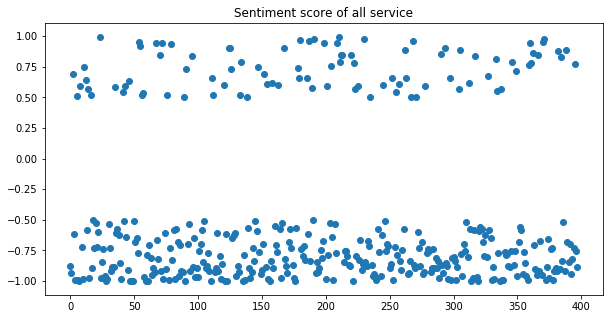

In [24]:
#all service
senti =  []
total, count = 0, 0
for sentence in service:
    sentiment = jiagu.sentiment(sentence)
    sc = sentiment[1]
    if sentiment[0] == 'negative':
        sc = sentiment[1]*(-1)
    senti.append(sc)
fig = plt.figure(figsize=(10,5))
plt.scatter(range(len(senti)),senti)
plt.title('Sentiment score of all service')
count = 0
for i in senti:
    if i>0:
        count+=1
count/len(senti)

Text(0.5, 1.0, 'Sentiment score of after sale service')

0.21897810218978103

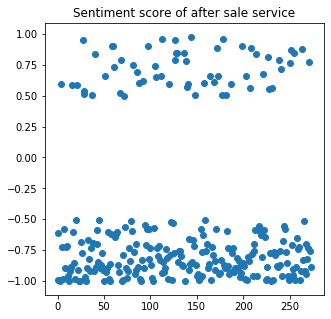

In [25]:
#aftersale
senti =  []
total, count = 0, 0
for sentence in aftersale:
    sentiment = jiagu.sentiment(sentence)
    sc = sentiment[1]
    if sentiment[0] == 'negative':
        sc = sentiment[1]*(-1)
    senti.append(sc)
fig = plt.figure(figsize=(5,5))
plt.title('Sentiment score of after sale service')
plt.scatter(range(len(senti)),senti)
count = 0
for i in senti:
    if i>0:
        count+=1
count/len(senti)

Text(0.5, 1.0, 'Sentiment score of prosale service')

0.27419354838709675

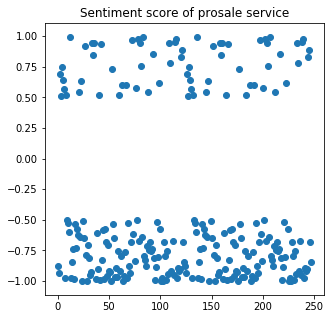

In [26]:
# prosale
senti =  []
total, count = 0, 0
for sentence in onlysale:
    sentiment = jiagu.sentiment(sentence)
    sc = sentiment[1]
    if sentiment[0] == 'negative':
        sc = sentiment[1]*(-1)
    senti.append(sc)
fig = plt.figure(figsize=(5,5))
plt.title('Sentiment score of prosale service')
plt.scatter(range(len(senti)),senti)
count = 0
for i in senti:
    if i>0:
        count+=1
count/len(senti)

Text(0.5, 1.0, 'Positive sentiment ratio')

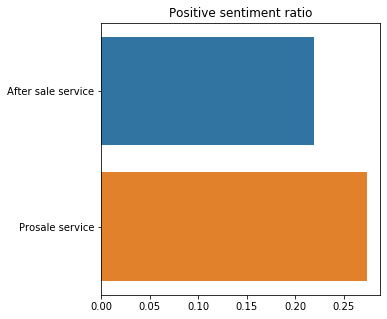

In [28]:
f,ax=plt.subplots(1,1,figsize=(5,5))
sns.barplot(x = [0.218978,0.27419354],
            y = ['After sale service','Prosale service'])
ax.set_title('Positive sentiment ratio')

### 售后 tfidf

In [51]:
def loadDataset(aftersale):
    corpus = ''
    #加载停用词表
    stop = [line.strip().decode('utf-8') for line in open('..\data\stop_words_5.txt','rb').readlines() ]
    #无外观内饰空间舒适油耗动力操控配置性价比
    for line in aftersale:
        segs = jieba.lcut(line, cut_all=True)   #, cut_all=True
        segs = pseg.cut(line)
        final = ''
        for seg, flag in segs:
            #去停用词
            if seg not in stop:
                #去数词和去字符串
                if flag !='m' and flag !='x':
                        #输出分词
                    final +=' '+ seg 
    #             corpus.append(final)
        corpus += ' ' +final 
            
    return corpus
# dataset = loadDataset()

In [52]:
def tfidf(dataset):
    tv=TfidfVectorizer(min_df=0.,max_df=1.,norm='l2',use_idf=True,smooth_idf=True)
    tv_matrix=tv.fit_transform([dataset])
    #print(tv_matrix)
    tv_matrix=tv_matrix.toarray()
    #print(tv_matrix)
    vocab=tv.get_feature_names()
    df_com = pd.DataFrame(np.round(tv_matrix,2),columns=vocab).T.sort_values(by=[0],ascending=False)
    df_com.columns = ['tf-idf']
    return df_com[0:55]

In [55]:
dataset = loadDataset(aftersale)

In [61]:
df_aftersale = tfidf(dataset)[0:25]
df_aftersale

,tf-idf
保养,0.85
维修,0.37
费用,0.18
售后,0.17
价格,0.12
维修保养,0.11
后期,0.11
太贵,0.08
配件,0.07
售后服务,0.07


In [62]:
df_aftersale = tfidf(dataset)[0:25]
#df_aftersale.loc['价格'] = df_aftersale.loc['价格']+df_aftersale.loc['费用']+df_aftersale.loc['太贵']
#df_aftersale.loc['售后服务'] = df_aftersale.loc['售后']+df_aftersale.loc['售后服务']+df_aftersale.loc['服务']
# df_aftersale = df_aftersale.drop(index = ['费用','太贵'])
df_aftersale.sort_values("tf-idf",inplace=True, ascending = False)
df_aftersale
df_aftersale.to_csv('..\data\aftersale comment.csv')

,tf-idf
保养,0.85
维修,0.37
费用,0.18
售后,0.17
价格,0.12
维修保养,0.11
后期,0.11
太贵,0.08
配件,0.07
售后服务,0.07


In [67]:
dataset = loadDataset(onlysale)
df_onlysale = tfidf(dataset)[0:23]
df_onlysale
df_onlysale.to_csv('..\data\prosale comment.csv')

,tf-idf
销售,0.87
服务,0.41
服务态度,0.09
顾问,0.07
服务费,0.06
4s店,0.06
热情,0.05
提车,0.05
打电话,0.03
买车,0.03
